# Project: Wrangling and Analyze Data

# By: Azubuike Chibuike Henry

# Introduction
The dataset I'll be wrangling is from the tweet archive of this Twitter user @dog_rates, also known as
WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with humorous comment about
the dogs.

The wrangling process will involve:
1. Gathering data
2. Assessing data
3. Cleaning data
4. Storing data

## Data Gathering
Data will be gathered from three (3) sources for this project:

> The first file is a Twitter archive data (csv file), which I'll directly download, upload and read into a
pandas dataframe

> For the second file, I'll use the Requests library to programmatically download the tweet image prediction
(image_predictions.tsv) from a neural network hosted on Udacity's servers

> Finally, for the last file, I'll use the Tweepy library to query additional data through the Twitter API for each
tweet's JSON data and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

### 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import requests
import numpy as np

In [2]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Data inspection

In [3]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [4]:
twitter_archive_df['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [5]:
twitter_archive_df['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [14]:
# row with invalid denominator rating of zero (0)

twitter_archive_df[twitter_archive_df['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [18]:
# Some invalid data are seen as names

twitter_archive_df['name'].sample(5)

1936     one
807     None
1198    Link
1106    None
497     None
Name: name, dtype: object

In [19]:
# Some texts are retweets and not original tweets, an example can be seen in entry 818

twitter_archive_df['text'].sample(5)

206     This is Aspen. She's never tasted a stick so s...
2185    This is Ruby. She's a Bimmington Fettuccini. O...
1282    This is Coco. She gets to stay on the Bachelor...
1126    Say hello to Ollie. He conducts this train. He...
818     RT @dog_rates: Here's a doggo blowing bubbles....
Name: text, dtype: object

In [6]:
# Displaying rows that contain retweet in their texts

twitter_archive_df.loc[twitter_archive_df['text'].str.contains('RT')].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


In [7]:
# No duplicated data is seen in the dataset

twitter_archive_df.duplicated().sum()

0

### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image_predictions.tsv', 'w') as f:
    f.write(response.text)
image_prediction_df = pd.read_csv('image_predictions.tsv', sep = '\t')

image_prediction_df1 = image_prediction_df.copy()
image_prediction_df.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Data inspection

In [9]:
image_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
image_prediction_df.duplicated().sum()

0

In [11]:
image_prediction_df['p1_dog'].unique()

array([ True, False])

In [12]:
image_prediction_df['p1_conf'].unique()

array([0.465074 , 0.506826 , 0.596461 , ..., 0.716012 , 0.323581 ,
       0.0970486])

### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
with open ('tweet_json.txt', encoding = "utf-8") as f:
    tweet_json_df = pd.DataFrame(pd.json_normalize([json.loads(line) for line in f.readlines()]), columns = ['id', 'favorite_count', 'retweet_count'])

tweet_json_df1 = tweet_json_df.copy()
tweet_json_df.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Data inspection

In [16]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Assessing Data
In this section, I detected and documented at least **eight (8) quality issues and two (2) tidiness issue**, using **both** visual assessment
and programmatic assessement to assess the data.




### Quality issues
1. Presence of 'None' for missing records, instead of pandas 'NaN'

2. From Twitter archive data: invalid data in the 'name' column like 'an', 'a', 'such', 'quite', and so on

3. Inconsistent data types in the 'retweeted_status_timestamp' column

4. 'tweet_id' column contains integer data type which might distort analysis

5. The 'text' column contains both original tweets and retweets, while we were required to work with just original tweets

6. Row contains invalid denominator rating of zero (0)

7. Most of the column headers especially in the 'image_prediction' data set are not quite descriptive like 'p1_conf', 'p1_dog', 'p2', and the rest of them

8. Presence of retweet columns that won't be needed


### Tidiness issues
1. Combining the three(3) dataframes: Difference in column header names containing same data ('twitter_id' and 'id'), which will be an issue in merging the data sets

2. Separate columns for the dog stages

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

#### Make copies of original pieces of data

In [17]:
twitter_archive_df1 = twitter_archive_df.copy()
image_prediction_df1 = image_prediction_df.copy()
tweet_json_df1 = tweet_json_df.copy()

### Issue #1:

#### Define: Combining the three(3) dataframes: Difference in column header names containing same data ('tweet_id' and 'id'), which will be an issue in merging the data sets

#### Code :
>#### Renaming the "id" column in the tweet_json dataframe to "tweet_id" for uniformity

In [18]:
tweet_json_df1.rename(columns={'id':'tweet_id'}, inplace=True)
tweet_json_df1.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


#### Merging the 3 dataframes

In [19]:
twitter_archive_master = pd.merge(twitter_archive_df1, image_prediction_df1, on='tweet_id')
twitter_archive_master = pd.merge(twitter_archive_master, tweet_json_df1, on='tweet_id')
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


#### Test

In [20]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### Issue #2:

#### Define: Presence of 'None' for missing records, instead of pandas 'NaN'

#### Code :
>#### Replacing 'None' with pandas 'NaN'

In [21]:
twitter_archive_master.replace(to_replace="None", value=np.nan, inplace=True)

#### Test

In [22]:
twitter_archive_master.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
1576,675781562965868544,NaN,NaN,2015-12-12 20:57:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Buddah. He was Waldo for Hallowee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675781562...,...,0.921968,True,West_Highland_white_terrier,0.017811,True,toy_poodle,0.013555,True,1750,537
1005,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,...,0.740229,True,miniature_poodle,0.081915,True,toy_poodle,0.063748,True,5093,1920
1577,675740360753160193,NaN,NaN,2015-12-12 18:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper licking in slow motion. 12/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675740360...,...,0.800495,True,kuvasz,0.097756,True,Saluki,0.068415,True,1257,388


### Issue #3:

#### Define: Separate columns for the dog stages

#### Code :
>#### Summing the different dog stages column into one

In [23]:
twitter_archive_master['dog_stages']= twitter_archive_master['floofer'].fillna('') + twitter_archive_master['doggo'].fillna('') + twitter_archive_master['pupper'].fillna('') + twitter_archive_master['puppo'].fillna('')

twitter_archive_master['dog_stages'].replace(to_replace='', value=np.nan, inplace=True)

twitter_archive_master.drop(['floofer', 'doggo','pupper', 'puppo'], axis=1, inplace=True )


#### Test

In [24]:
twitter_archive_master['dog_stages'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'flooferdoggo', 'doggopupper'], dtype=object)

### Issue #4:

#### Define: Invalid data in the 'name' column like 'an', 'a', 'such', 'quite', and so on

#### Code :
>#### Using regular expressions to correctly extract the dog names from the 'text' column and store them in a new column

In [25]:
twitter_archive_master['this_is'] = twitter_archive_master['text'].str.extract(r'(?<=This is )([A-Z]\w*)')

twitter_archive_master['meet'] = twitter_archive_master['text'].str.extract(r'(?<=Meet )([A-Z]\w*)')

twitter_archive_master['here_is'] = twitter_archive_master['text'].str.extract(r'(?<=Here is )([A-Z]\w*)')

twitter_archive_master['name_is'] = twitter_archive_master['text'].str.extract(r'(?<=Name is )([A-Z]\w*)')

twitter_archive_master['that_is'] = twitter_archive_master['text'].str.extract(r'(?<=That is )([A-Z]\w*)')

twitter_archive_master['say_hello_to'] = twitter_archive_master['text'].str.extract(r'(?<=Say hello to )([A-Z]\w*)')

twitter_archive_master['new_names'] = twitter_archive_master['meet'].fillna('') + twitter_archive_master['here_is'].fillna('') + twitter_archive_master['name_is'].fillna('') + twitter_archive_master['that_is'].fillna('') + twitter_archive_master['say_hello_to'].fillna('') + twitter_archive_master['this_is'].fillna('')

twitter_archive_master['new_names'].replace(to_replace='', value=np.nan, inplace=True)

twitter_archive_master.drop(['this_is', 'meet','here_is', 'name_is', 'that_is', 'say_hello_to'], axis=1, inplace=True )


#### Test

In [26]:
twitter_archive_master['new_names'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'BeauBeau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold',
       'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley',
       'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey

In [27]:
twitter_archive_master.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stages,new_names
1510,677918531514703872,NaN,NaN,2015-12-18 18:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Everything looks pretty good in there. Make s...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/677918531...,...,dalmatian,0.153225,True,American_Staffordshire_terrier,0.107798,True,1476,463,NaN,NaN
1502,678396796259975168,NaN,NaN,2015-12-20 02:09:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These little fellas have opposite facial expre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678396796...,...,Cardigan,0.031803,True,Chihuahua,0.006276,True,1731,478,NaN,NaN
1660,673919437611909120,NaN,NaN,2015-12-07 17:38:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Obie. He is on guard watching for evil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673919437...,...,schipperke,0.115984,True,miniature_pinscher,0.052175,True,1251,401,pupper,Obie
1665,673709992831262724,NaN,NaN,2015-12-07 03:45:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know a lot of you are studying for finals. G...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673709992...,...,Siamese_cat,0.181580,False,kelpie,0.178227,True,908,306,NaN,NaN
1138,703382836347330562,NaN,NaN,2016-02-27 00:55:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He's a West Side Niddlewog. M...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703382836...,...,standard_poodle,0.014392,True,Tibetan_mastiff,0.012022,True,3837,1285,NaN,Charlie


### Issue #5:

#### Define: Inconsistent data types in the 'retweeted_status_timestamp' column

#### Code :
>#### Converting the data type to datetime

In [28]:
twitter_archive_master['retweeted_status_timestamp']=pd.to_datetime(twitter_archive_master['retweeted_status_timestamp'])

#### Test

In [29]:
twitter_archive_master['retweeted_status_timestamp'].dtypes

datetime64[ns, UTC]

### Issue #6:

#### Define: row with invalid denominator rating of zero (0)

#### Code :
>#### Dropping off row with invalid denominator rating of zero (0)

In [21]:
inalid_denominator = twitter_archive_master.loc[twitter_archive_master['rating_denominator']==0].index
inalid_denominator
twitter_archive_master.drop(twitter_archive_master.index[inalid_denominator], inplace=True)

#### Test

In [22]:
twitter_archive_df1[twitter_archive_df1['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #7:

#### Define: The 'text' column contains both original tweets and retweets, while we were required to work with just original tweets

#### Code :
>#### The retweets usually contain 'RT', and this will be used to drop all rows containing 'retweet' in the 'text' colunm

In [32]:
retweets = twitter_archive_master.loc[twitter_archive_master['text'].str.contains('RT')].index
retweets
twitter_archive_master.drop(twitter_archive_master.index[retweets], inplace=True)

#### Test

In [33]:
twitter_archive_master.loc[twitter_archive_master['text'].str.contains('RT')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stages,new_names


### Issue #8:

#### Define:  'time_stamp' column contains object data type

#### Code :
>#### Converting the data type to datetime

In [34]:
twitter_archive_master['timestamp']=pd.to_datetime(twitter_archive_master['timestamp'])

#### Test

In [35]:
twitter_archive_master['timestamp'].dtypes

datetime64[ns, UTC]

### Issue #9:

#### Define: Most of the column headers especially in the 'image_prediction' data set are not quite descriptive like 'p1_conf', 'p1_dog', 'p2', and the rest of them

#### Code :
>#### Renaming headers to something more descriptive

In [36]:
twitter_archive_master=twitter_archive_master.rename(columns={'p1':'prediction1', 'p1_conf':'prediction1_confidence', 'p1_dog':'prediction1_dog', 'p2':'prediction2', 'p2_conf':'prediction2_confidence', 'p2_dog':'prediction2_dog', 'p3':'prediction3', 'p3_conf':'prediction3_confidence', 'p3_dog':'prediction3_dog'})

#### Test

In [37]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2072
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1986 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   1986 non-null   datetime64[ns, UTC]
 4   source                      1986 non-null   object             
 5   text                        1986 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               1986 non-null   object             
 10  rating_numerator            1986 non-null   int64           

### Issue #10:

#### Define: Presence of retweet columns that won't be needed

#### Code :
>#### Dropping off retweet columns 

In [38]:
twitter_archive_master.drop(['retweeted_status_user_id','retweeted_status_id','retweeted_status_timestamp', 'name', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [39]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tweet_id                1986 non-null   object             
 1   timestamp               1986 non-null   datetime64[ns, UTC]
 2   source                  1986 non-null   object             
 3   text                    1986 non-null   object             
 4   expanded_urls           1986 non-null   object             
 5   rating_numerator        1986 non-null   int64              
 6   rating_denominator      1986 non-null   int64              
 7   jpg_url                 1986 non-null   object             
 8   img_num                 1986 non-null   int64              
 9   prediction1             1986 non-null   object             
 10  prediction1_confidence  1986 non-null   float64            
 11  prediction1_dog         1986 non-null   boo

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [40]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [41]:
pd.options.display.max_columns = 999

twitter_archive_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,favorite_count,retweet_count,dog_stages,new_names
1792,671115716440031232,2015-11-29 23:57:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Meet Phred. He isn't steering, looking at the ...",https://twitter.com/dog_rates/status/671115716...,6,10,https://pbs.twimg.com/media/CVBILUgVAAA1ZUr.jpg,1,malinois,0.406341,True,kelpie,0.143366,True,dingo,0.129802,False,1436,842,NaN,Phred
2005,667177989038297088,2015-11-19 03:10:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a Dasani Kingfisher from Maine. His na...,https://twitter.com/dog_rates/status/667177989...,8,10,https://pbs.twimg.com/media/CUJK18UWEAEg7AR.jpg,1,vizsla,0.259249,True,Chesapeake_Bay_retriever,0.176293,True,Weimaraner,0.112369,True,200,58,NaN,NaN
1383,684188786104872960,2016-01-05 01:44:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Yo Boomer I'm taking a selfie, grab your stic...",https://twitter.com/dog_rates/status/684188786...,10,10,https://pbs.twimg.com/media/CX66EiJWkAAVjA-.jpg,1,kelpie,0.537782,True,American_Staffordshire_terrier,0.082953,True,Staffordshire_bullterrier,0.069760,True,3831,1343,NaN,NaN
566,785639753186217984,2016-10-11 00:34:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False,8735,2561,doggopupper,Pinot
1191,698703483621523456,2016-02-14 03:01:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He has no respect for POULTRY p...,https://twitter.com/dog_rates/status/698703483...,7,10,https://pbs.twimg.com/media/CbJLG0HWwAAV-ug.jpg,1,Brittany_spaniel,0.931963,True,Welsh_springer_spaniel,0.030695,True,beagle,0.012896,True,1608,425,NaN,Rusty


### Obtaining dog stage value count :

In [44]:
twitter_archive_master['dog_stages'].value_counts()

pupper          202
doggo            63
puppo            22
doggopupper       9
floofer           7
doggopuppo        1
flooferdoggo      1
Name: dog_stages, dtype: int64

### Obtaining average likes of each dog stage category :

In [45]:
twitter_archive_master.groupby('dog_stages')['favorite_count'].mean().sort_values(ascending=False)

dog_stages
doggopuppo      47844.000000
puppo           21582.090909
doggo           19356.380952
flooferdoggo    17169.000000
floofer         13206.000000
doggopupper     12533.111111
pupper           7226.554455
Name: favorite_count, dtype: float64

### Obtaining dog stage category with the most favorite count :

In [46]:
twitter_archive_master[twitter_archive_master['favorite_count']==twitter_archive_master['favorite_count'].max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,jpg_url,img_num,prediction1,prediction1_confidence,prediction1_dog,prediction2,prediction2_confidence,prediction2_dog,prediction3,prediction3_confidence,prediction3_dog,favorite_count,retweet_count,dog_stages,new_names
329,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True,132810,48265,puppo,NaN


### Insights:
1. By obtaining the “value count” for each of the dog stages (using the “.value_counts()” method ), The most popular dog stage as regarding this particular dataset was found to be the 'pupper' category, with 202 appearances/counts, followed by “doggo” having 63 counts, and “puppo” having 22 counts. 

2. By using the “.groupby()” method and applying the “mean” on the “favorite count” for each dog stage category , The dog stage that had the least average likes was found to be the 'pupper' category, having an average of 7227 likes. The “puppo” category had a much higher average “favorite count” of about 21582 likes.

3. The third and final insight which was gotten by using the “.max()” method was that, the dog that had the most favorite count (likes) of 132,810 was from the 'puppo' category.

### Visualization

### A bar plot of average likes for the various dog stages

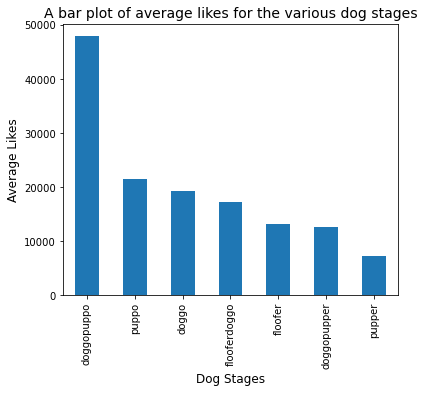

In [47]:
import matplotlib.pyplot as plt

plt.figure (figsize=(6,5))
twitter_archive_master.groupby('dog_stages')['favorite_count'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel ('Dog Stages', fontsize=12)
plt.ylabel ('Average Likes', fontsize=12)
plt.title('A bar plot of average likes for the various dog stages', fontsize=14)
plt.show()

 This was a visualization of the second observed insight from my analysis. The graph above graphically shows the various dog stages and their average likes. From the chart it can be seen that the dog stage that had the least average likes was found to be the 'pupper' category, having an average of 7227 likes. The “puppo” category had a much higher average “favorite count” of about 21582 likes.

This concludes my analysis on this project.